<a href="https://colab.research.google.com/github/AbhishreeDeshpande/GrapeDisease-detection/blob/main/TrainandTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Unzip NGLD
!unzip /content/drive/MyDrive/NGLD.zip -d /content/data_ngld

# Unzip Kaggle dataset
!unzip /content/drive/MyDrive/kaggle_grape.zip -d /content/data_kaggle


unzip:  cannot find or open /content/drive/MyDrive/NGLD.zip, /content/drive/MyDrive/NGLD.zip.zip or /content/drive/MyDrive/NGLD.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/kaggle_grape.zip, /content/drive/MyDrive/kaggle_grape.zip.zip or /content/drive/MyDrive/kaggle_grape.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/GDD/GRAPE_dataset2.zip -d /content/data_ngld

Streaming output truncated to the last 5000 lines.
  inflating: /content/data_ngld/Original Data/train/ESCA/33880a34-ebaa-47df-916a-d65d4662a1c0___FAM_B.Msls 1790.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/33880a34-ebaa-47df-916a-d65d4662a1c0___FAM_B.Msls 1790_flipLR.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/3394d516-c118-4362-b159-da7a97bcde07___FAM_B.Msls 1120.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/3394d516-c118-4362-b159-da7a97bcde07___FAM_B.Msls 1120_flipLR.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/33f8d1cd-0773-4a0c-a82d-ec43072cabef___FAM_B.Msls 0876_flipLR.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/33fa4137-bd24-45af-a9b8-ad63c6173123___FAM_B.Msls 4351.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/33fa4137-bd24-45af-a9b8-ad63c6173123___FAM_B.Msls 4351_flipLR.JPG  
  inflating: /content/data_ngld/Original Data/train/ESCA/33ff42ab-8ff7-46b6-baa2-7b7b6ae799af__

In [ ]:
!unzip /content/drive/MyDrive/GDD/NGLD.zip -d /content/data_ngld

Archive:  /content/drive/MyDrive/GDD/NGLD.zip
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial Leaf Spot_15.jpg  
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial Leaf Spot_17.jpg  
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial Leaf Spot_14.jpg  
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial Leaf Spot_16.jpg  
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial Leaf Spot_11.jpg  
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial Leaf Spot_10.jpg  
  inflating: /content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset/Bacterial Rot/Bacterial 

In [25]:
!ls "/content/drive/MyDrive/GDD"


GRAPE_dataset2.zip  NGLD.zip


In [ ]:
!ls /content/data_ngld


'Niphad Grape Leaf Disease Dataset (NGLD)'  'Original Data'


In [ ]:
!ls "/content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)"


'Grapes Disease Dataset'


In [ ]:
!ls "/content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset"


'Bacterial Rot'  'Downey Mildew'  'Healthy Leaves'  'Powdery Mildew'


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical


DATA_DIR = "/content/data_ngld/Niphad Grape Leaf Disease Dataset (NGLD)/Grapes Disease Dataset"
print(os.listdir(DATA_DIR))
CATEGORIES = ['Bacterial Rot',  'Downey Mildew',  'Healthy Leaves',  'Powdery Mildew']
IMG_SIZE = 128  # Also define image size here

data = []
labels = []

for i, category in enumerate(CATEGORIES):
    folder = os.path.join(DATA_DIR, category)
    for img_name in os.listdir(folder):
        try:
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(i)
        except Exception as e:
            print(f"Skipped: {img_name}, Reason: {e}")

X = np.array(data) / 255.0
y = to_categorical(np.array(labels))


['Powdery Mildew', 'Bacterial Rot', 'Healthy Leaves', 'Downey Mildew']


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("One-hot label sample:", y[0])


X shape: (2726, 128, 128, 3)
y shape: (2726, 4)
One-hot label sample: [1. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5780 - loss: 1.0271 - val_accuracy: 0.6685 - val_loss: 0.8697
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7142 - loss: 0.7246 - val_accuracy: 0.7692 - val_loss: 0.5722
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7963 - loss: 0.5309 - val_accuracy: 0.8480 - val_loss: 0.4085
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8398 - loss: 0.4430 - val_accuracy: 0.8755 - val_loss: 0.3323
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8732 - loss: 0.3508 - val_accuracy: 0.9066 - val_loss: 0.2806
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9127 - loss: 0.2663 - val_accuracy: 0.8498 - val_loss: 0.4173
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9089 - loss: 0.2677 - val_accuracy: 0.9158 - val_loss: 0.2286
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9431 - loss: 0.1700 - val_accuracy: 0.9249 - val_los

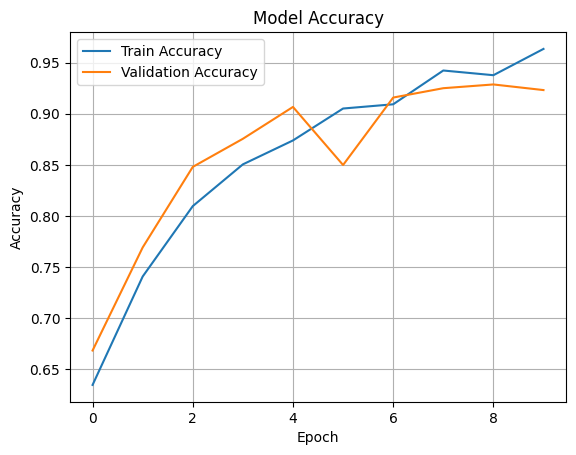

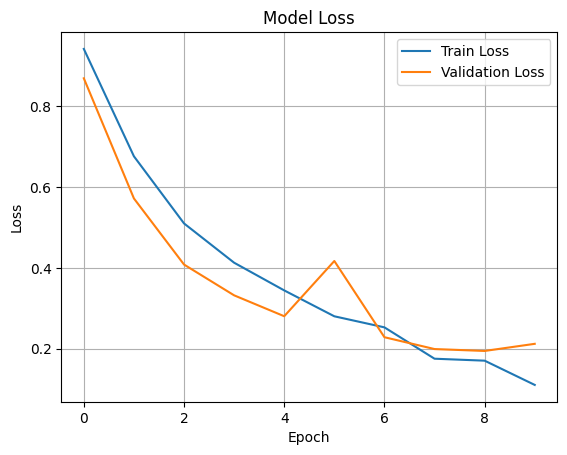

In [27]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


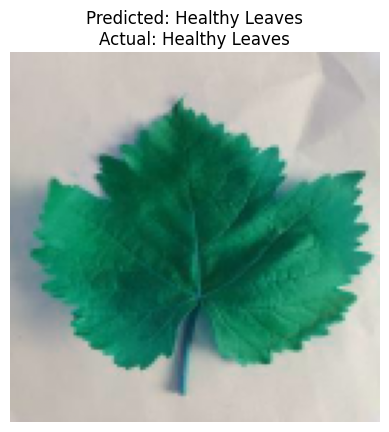

In [28]:
import random

index = random.randint(0, len(X_test) - 1)
test_img = X_test[index]
true_label = y_test[index]

# Predict
prediction = model.predict(np.expand_dims(test_img, axis=0))[0]
predicted_class = CATEGORIES[np.argmax(prediction)]
actual_class = CATEGORIES[np.argmax(true_label)]

# Show result
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}\nActual: {actual_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


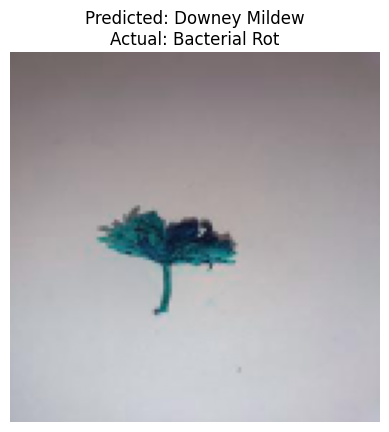

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


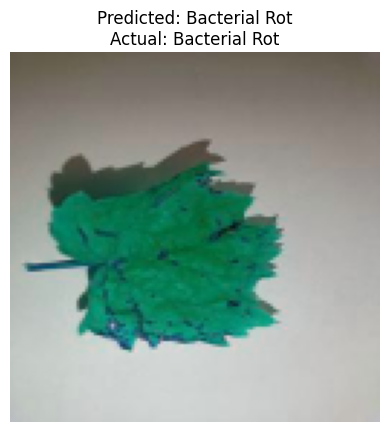

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


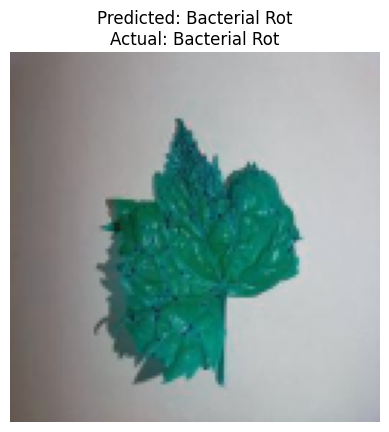

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


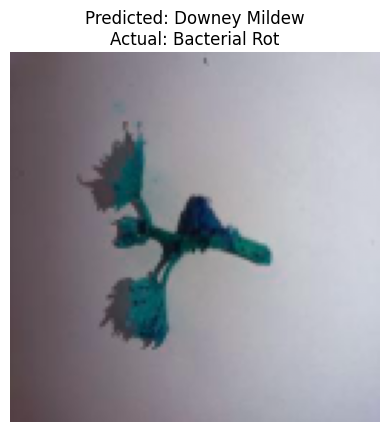

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


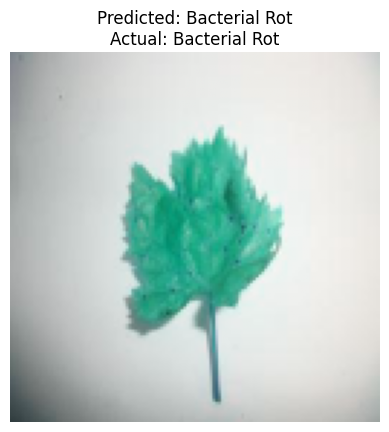

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


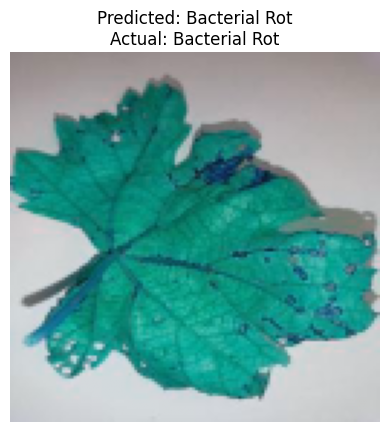

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


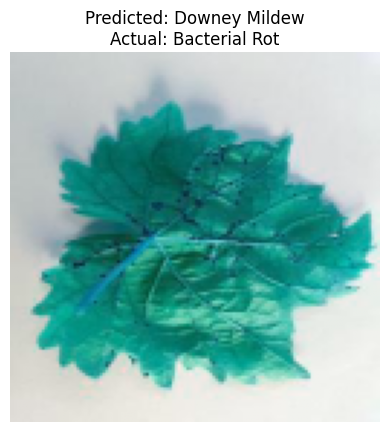

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


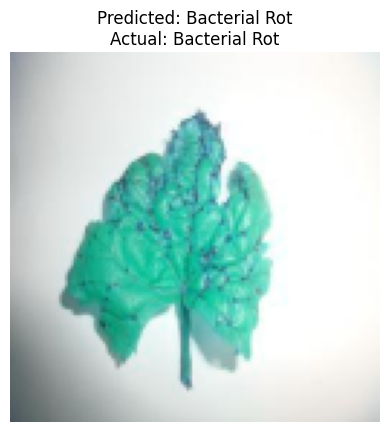

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


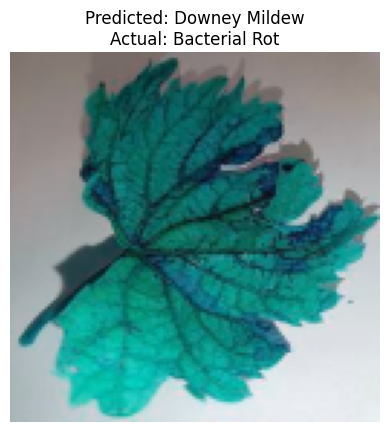

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


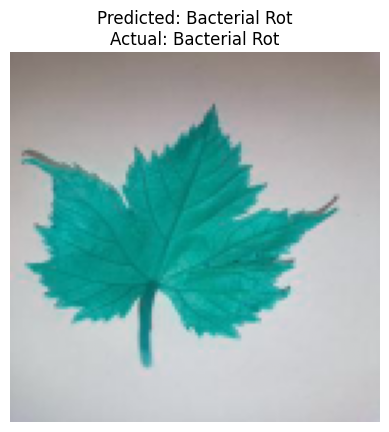

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


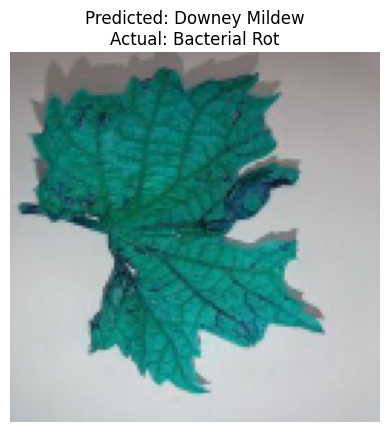

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


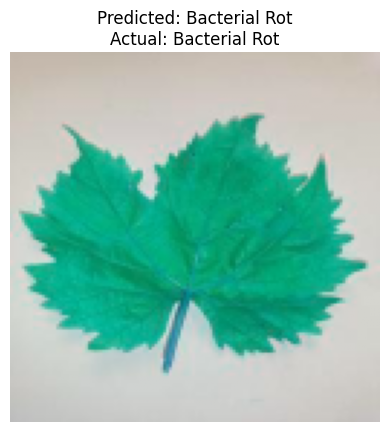

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


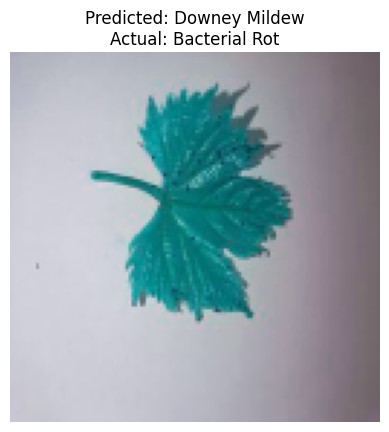

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


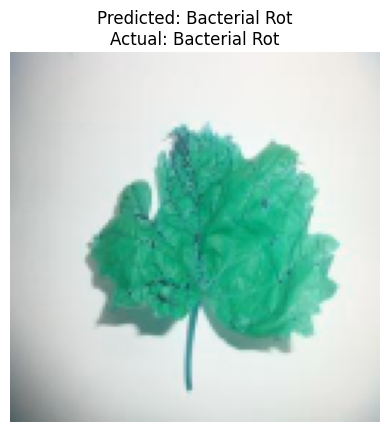

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


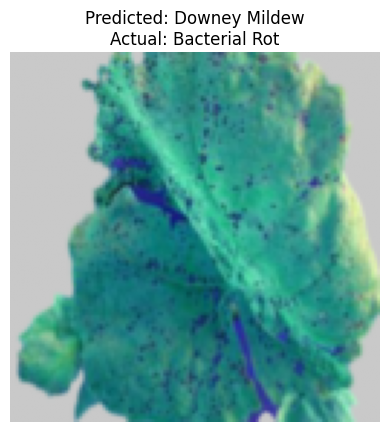

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


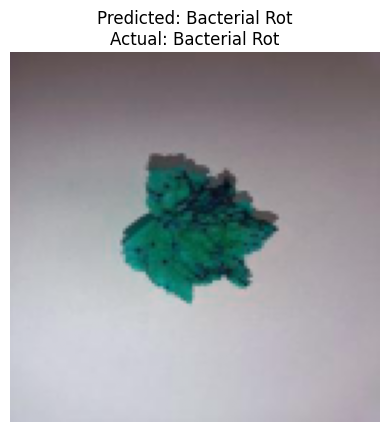

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# ✅ Set your target class here
target_class = 'Bacterial Rot'  # or 'Esca', 'Leaf_blight'

target_index = CATEGORIES.index(target_class)

# Loop through and show all matching images
count = 0
for i in range(len(X_test)):
    if np.argmax(y_test[i]) == target_index:
        test_img = X_test[i]
        true_label = y_test[i]

        prediction = model.predict(np.expand_dims(test_img, axis=0))[0]
        predicted_class = CATEGORIES[np.argmax(prediction)]
        actual_class = CATEGORIES[np.argmax(true_label)]

        plt.imshow(test_img)
        plt.title(f"Predicted: {predicted_class}\nActual: {actual_class}")
        plt.axis('off')
        plt.show()

        count += 1

